# KNN CLASSIFICATION

In [30]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [31]:
df=pd.read_csv('D:\Datasets\Classified Data', index_col=0)   # this is a classified data from a company resource, so we are not given the details of the column to protect their customer data
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


* We know that KNN is mainly depends on the datapoints which are near to the unknown values.
* So scale of the data points make a huge difference in choosing which neighbour around the unknown value
* So we genrally scale the values we have received from the dataset

In [32]:
X = df.drop('TARGET CLASS', axis= 1)
y = df['TARGET CLASS']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=9)

In [34]:
y = df['TARGET CLASS']  
y[:5]   # Here we have ready with the Target Class/ array as y

0    1
1    0
2    0
3    1
4    1
Name: TARGET CLASS, dtype: int64

In [35]:
# Let's split the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=101)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
# Now let's train the model using KNNClassifier()
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)     #initiansing the model and we set k=1, just to see the error rate
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [38]:
# Time for predictions
predictions = model.predict(X_test)

In [39]:
print(y_test[:5])
print()
predictions[:5]     # It seems like the model has performed well, but we shall check for error rate

545    0
298    0
109    0
837    0
194    0
Name: TARGET CLASS, dtype: int64



array([0, 0, 0, 0, 0], dtype=int64)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))   # we see that the accuracy is around 92% which is good, but we can make it better
print()
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       159
           1       0.94      0.90      0.92       141

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300


[[151   8]
 [ 14 127]]


In [41]:
# From here on we shall try to choose the better value of k for better accuracy
error_rate = []     # an empty list which can hold the error rate values

In [42]:
# I choose the range from 1 to 40 for k-value to iterate to find the best value of k
for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    predict_i = model.predict(X_test)
    error_rate.append(np.mean(predict_i != y_test))     # average error rate, takes the mean of the errors

Text(0, 0.5, 'Error rate')

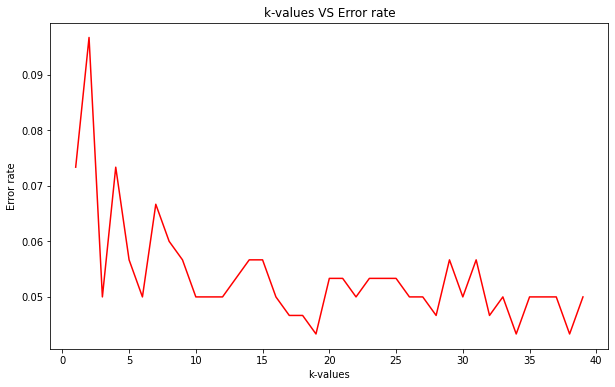

In [43]:
plt.figure(figsize=(10,6))
sns.lineplot(x=range(1,40), y= error_rate, color='red')
plt.title('k-values VS Error rate')
plt.xlabel('k-values')
plt.ylabel('Error rate')

* from the plot we can see that it, the error rate is high for values starting from k=1
* The error rate decreases near the range of 15-20 and then again goes high
* The error rate is minimum near the k values=19, but it increases again a lot
* So we can choose that k=34, which is ideal
* We could have choosen k=19, but higher k values leads to overfitting of data

In [48]:
model_final = KNeighborsClassifier(n_neighbors=34)
model_final.fit(X_train, y_train)
predict_final = model_final.predict(X_test)

In [49]:
# Now let's check the metrics
print(confusion_matrix(y_test, predict_final))
print(classification_report(y_test, predict_final))

[[153   6]
 [  7 134]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.96      0.95      0.95       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



* Here, from the metrics we see that accuracy has been increased from 92% to 95%